# Set up Python for Geo-Spatial Analysis

The following steps provide some guidelines and links on how to set up different modules for conduction sptail analysis in Python.

### Step 1
If you know how to use Github, clone this repository to your local machine. If you don't know how to use Github, download this repository as a ZIP file and extract it in a directory in your local machine.


### Step 2

Install the Anaconda package. Most likely you will need to do this if you never installed Python in your computer and you are currently reading this content from the Github repository. If you have version of Anaconda that is old, it may not hurt to remove the current version and install a fresh version of the package. You can [download Anaconda from this link](https://www.anaconda.com/download/success)

Once you installed Anaconda, launch the Anaconda Navigator, and open the "Jupyter Lab" app. Then, search for this notebook, open it, and run the following cells.

### Step 3: Create a Google Earth Engine account 

Follow this link to register for a non-commercial account: [https://code.earthengine.google.com/register](https://code.earthengine.google.com/register). **Note that this could take a few days**, so do this step as soon as you can.


### Step 4: Create a Google Earth Engine project

Once you have a GEE account, follow this link to create a new project: https://console.cloud.google.com/cloud-resource-manager

### Step 5: Install the GEE module for Python

Install the Google Earth Engine by running the following command (you can run the following cell using `ctrl + Enter`)

In [ ]:
!pip install earthengine-api

### Step 6: Install remaining modules for geospatial analysis

In [ ]:
!pip install shapely folium geopandas rasterio xarray rioxarray

### Step 7: Check that everything is working as expected

In [2]:
# Import modules
import ee
import geopandas as gpd
import xarray as xr
import rioxarray
from shapely.geometry import Polygon
import numpy as np

#### Test if Google Earth Engine works

When running the code below, follow the link to generate a token, copy the authorization code, paste it in the input box below, and then press the "Enter" key

If prompted with "**Back to Safety**" ignore it and click "**Continue**"

In [4]:
# Authenticate the GEE account
ee.Authenticate()

# Initialize the library
ee.Initialize()


In [6]:
# You should be able to see the altitude for the specified point. The elevation is 317 m

# Define geographic coordinates
lat = 39.186512 # This is y
lon = -96.576844 # This is x

# Convert coordinates into a Point geometry following the x,y notation
point = ee.Geometry.Point([lon, lat])

# Load digital elevation model (DEM) from Shuttle Radar Topography Mission (SRTM) 
dem = ee.Image('USGS/SRTMGL1_003')

# Retrieve the elevation value: This step will get us the correct value
elev = dem.sample(point, 1).first().getNumber('elevation').getInfo()
print(f'Elevation: {elev} m')


Elevation: 317 m


#### Test if the GeoPandas module works

<Axes: >

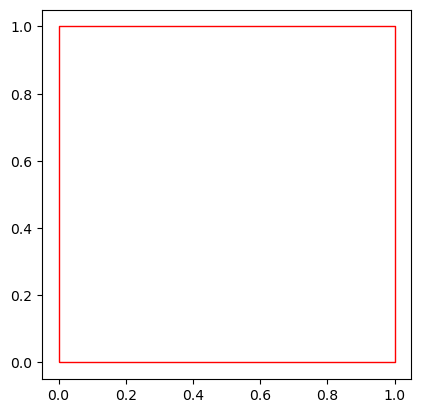

In [8]:
# Create a square
square = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
gdf_square = gpd.GeoDataFrame(geometry=[square])
gdf_square.plot(color='none', edgecolor='red')


#### Test if the Xarray module works

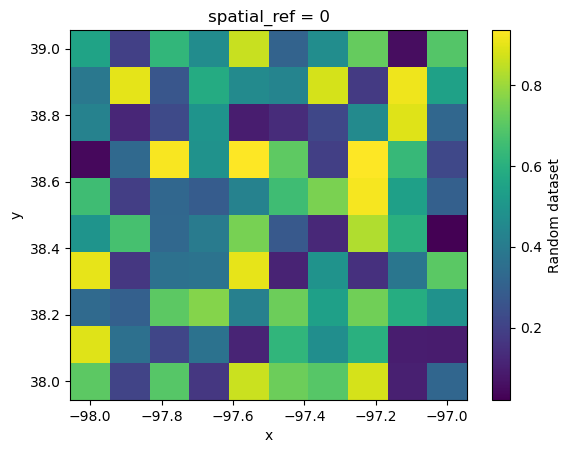

In [10]:
# Create a 2D array of random data
data = np.random.rand(10, 10)

# Create an Xarray DataArray with coordinates and dimensions
da = xr.DataArray(data,
                  dims=["y", "x"],
                  coords={"y": np.linspace(38,39,10), "x": np.linspace(-98,-97,10)},
                  name="Random dataset")

# Add coordinate reference system to DataArray (so that we can covert it to project coordinates later on)
da = da.rio.write_crs("EPSG:4326")

# Plot the data to visualize
da.plot(cmap="viridis");


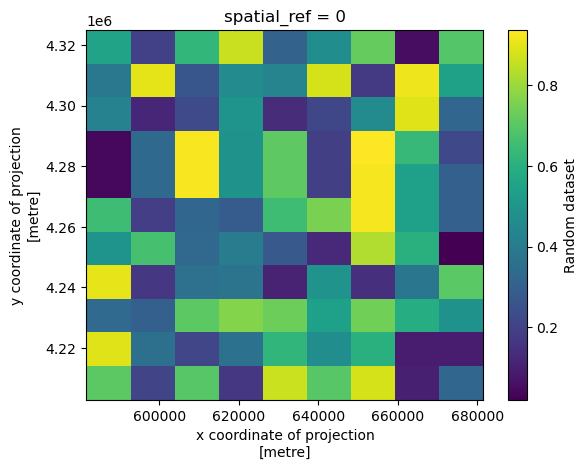

In [12]:
# To test the rioxarray module, let's reproject the dataarray to UTM 14
da_reprojected = da.rio.reproject("EPSG:32614")

# Plot the data to visualize
da_reprojected.plot(cmap="viridis");
